In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import itertools
import matplotlib.pyplot as plt

%matplotlib inline
import sklearn.decomposition as skde

In [2]:
filebase = 'data/fbpac-ads-en-US-cleaned'

print(f'Reading file {filebase}.csv...', end='', flush=True)
df = pd.read_csv(filebase + '.csv')
print(' done')

Reading file data/fbpac-ads-en-US-cleaned.csv... done


In [3]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df2 = pd.DataFrame(df.select_dtypes(include=numerics))
df2 = df2.dropna()
print(df2.shape)
df2.head()

(5731, 19)


,political,not_political,impressions,political_probability,targetedness,listbuilding_fundraising_proba,Activity on the Facebook Family,MaxAge,Like,MinAge,Created_At_Year,Created_At_Month,Updated_At_Year,Updated_At_Month,political_probability_int,fundraising_proba_int,is_political,is_not_political,is_impressions
44,0,1,1,0.808638,5.0,0.226403,0,29.0,0,15.0,2017,12,2017,12,7,1.0,0,1,1
82,18,1,1,0.997653,5.0,0.167494,0,29.0,0,18.0,2018,11,2018,11,8,0.0,1,0,1
91,1,0,1,0.999991,9.0,0.871742,0,49.0,0,34.0,2018,10,2018,10,8,7.0,1,0,1
95,1,4,3,0.885469,4.0,0.352562,0,64.0,0,25.0,2019,1,2019,1,7,2.0,0,1,1
98,10,1,1,1.000000,2.0,0.296376,0,35.0,0,18.0,2018,11,2018,11,8,1.0,1,0,1


In [4]:
pca_mod = skde.PCA()
pca_comps = pca_mod.fit(df2)
pca_comps

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [5]:
print(pca_comps.explained_variance_ratio_)
print(np.sum(pca_comps.explained_variance_ratio_))

[5.01745931e-01 2.40567655e-01 1.67104366e-01 5.89422264e-02
 1.19657597e-02 8.82222014e-03 5.01026535e-03 3.66508124e-03
 1.55590465e-03 2.66624031e-04 1.59333233e-04 1.18529630e-04
 4.35192618e-05 1.49730024e-05 1.05996123e-05 3.22831281e-06
 2.38220893e-06 9.42165866e-07 4.59342586e-07]
1.0


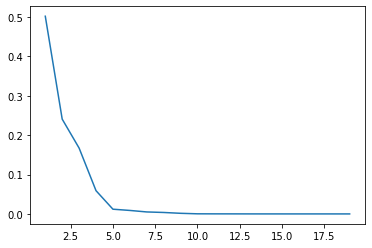

In [6]:
def plot_explained(mod):
    comps = mod.explained_variance_ratio_
    x = range(len(comps))
    x = [y + 1 for y in x]          
    plt.plot(x,comps)

plot_explained(pca_comps)

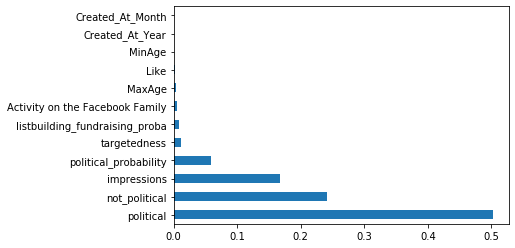

In [7]:
(pd.Series(pca_comps.explained_variance_ratio_, index=df2.columns)
   .nlargest(12)
   .plot(kind='barh')) 